In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf

In [165]:
train_df = pd.read_csv("option_train.csv")
train_df.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420,0.341270,0.03013,Under
1,0.125000,427.015526,465,0.166667,0.03126,Over
2,20.691244,427.762336,415,0.265873,0.03116,Under
3,1.035002,451.711658,460,0.063492,0.02972,Over
4,39.553020,446.718974,410,0.166667,0.02962,Under


## Process Data

- split into train and validation sets
- normalize X-data (data did not appear gaussian)
- build standardized pandas DF for statsmodels ols regression summary

In [166]:
#create training and validation sets from df_train
train_nums = train_df.select_dtypes(["float64","int64"]) #not sure if allowed to use BS as a feature

y=train_nums["Value"].values
X=train_nums.drop("Value",axis=1).values

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.20,random_state = 1)


In [167]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_val_norm = mms.transform(X_val)

In [168]:
def normed_df(X,y):
    df1 = pd.DataFrame(X,columns = train_nums.columns[1:])
    df2 = pd.DataFrame(y,columns = ["Value"])
    df3 = pd.concat([df2,df1],axis=1)
    return df3

train_df_norm = normed_df(X_train_norm,y_train)
val_df_norm = normed_df(X_val_norm,y_val)

### Run regression models

Started with slr using K since it had the strongest linear relationship of any feature with value.

In [169]:
result1 = smf.ols('Value ~ K', data=train_df_norm).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     4849.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:08:35   Log-Likelihood:                -4421.0
No. Observations:                1344   AIC:                             8846.
Df Residuals:                    1342   BIC:                             8856.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.2368      0.510     94.514      0.000      47.236      49.238
K            -65.6902      0.943    -69.635      0.000     -67.541     -63.840
==============================================================================
Omnibus:                       17.326   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.705
Skew:                           0.189   Prob(JB):                     0.000641
Kurtosis:                       2.655   Cond. No.                         6.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Full Model** <br>
Run full model using all features

In [170]:
feats = ' + '.join(train_df_norm.columns[1:])
result2 = smf.ols('Value ~' + feats,data=train_df_norm).fit()       
result2.summary()
           

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     3415.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:08:35   Log-Likelihood:                -3824.9
No. Observations:                1344   AIC:                             7660.
Df Residuals:                    1339   BIC:                             7686.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0066      0.530     67.902      0.000      34.966      37.047
S             18.8558      0.529     35.641      0.000      17.818      19.894
K            -73.6662      0.637   -115.687      0.000     -74.915     -72.417
tau           12.4906      0.456     27.412      0.000      11.597      13.384
r              1.2907      0.545      2.368      0.018       0.221       2.360
==============================================================================
Omnibus:                      123.869   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.197
Skew:                           0.843   Prob(JB):                     2.70e-35
Kurtosis:                       3.005   Cond. No.                         9.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
result3 = smf.ols('Value ~ S + K + tau +r ',data=train_df_norm).fit()       
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     3415.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:08:35   Log-Likelihood:                -3824.9
No. Observations:                1344   AIC:                             7660.
Df Residuals:                    1339   BIC:                             7686.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0066      0.530     67.902      0.000      34.966      37.047
S             18.8558      0.529     35.641      0.000      17.818      19.894
K            -73.6662      0.637   -115.687      0.000     -74.915     -72.417
tau           12.4906      0.456     27.412      0.000      11.597      13.384
r              1.2907      0.545      2.368      0.018       0.221       2.360
==============================================================================
Omnibus:                      123.869   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.197
Skew:                           0.843   Prob(JB):                     2.70e-35
Kurtosis:                       3.005   Cond. No.                         9.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF (need to check with prof about this)

In [172]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(X_train_norm, j) for j in range(4)]

[4.3987363045647845, 7.203322349187848, 4.275181239998071, 2.182580432817126]

**Interaction Models** <br>

Currently the "best" model is using K, S and Ktau + Stau

In [173]:
result4 = smf.ols('Value ~ K + S + K*tau + S*tau ',data=train_df_norm).fit()       
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2991.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:08:36   Log-Likelihood:                -3768.8
No. Observations:                1344   AIC:                             7550.
Df Residuals:                    1338   BIC:                             7581.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5320      0.874     48.664      0.000      40.817      44.247
K            -89.8860      1.587    -56.641      0.000     -92.999     -86.773
S             21.9344      0.999     21.955      0.000      19.974      23.894
tau            2.4650      1.487      1.658      0.098      -0.452       5.382
K:tau         27.7961      2.531     10.981      0.000      22.831      32.762
S:tau         -6.9999      1.799     -3.891      0.000     -10.530      -3.470
==============================================================================
Omnibus:                      139.009   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.425
Skew:                           0.893   Prob(JB):                     2.44e-40
Kurtosis:                       3.255   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
result5 = smf.ols('Value ~ K + S*tau + K*tau + K*r + K*S',data = train_df_norm).fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1942.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:08:36   Log-Likelihood:                -3743.8
No. Observations:                1344   AIC:                             7506.
Df Residuals:                    1335   BIC:                             7552.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6150      1.344     26.493      0.000      32.978      38.252
K            -77.1232      2.550    -30.246      0.000     -82.125     -72.121
S             29.3575      1.656     17.727      0.000      26.109      32.606
tau            2.1444      1.464      1.465      0.143      -0.727       5.015
S:tau         -6.1354      1.780     -3.447      0.001      -9.627      -2.644
K:tau         27.4790      2.501     10.988      0.000      22.573      32.385
r              9.5418      1.378      6.926      0.000       6.839      12.244
K:r          -16.9988      2.685     -6.332      0.000     -22.265     -11.732
K:S          -13.8675      2.709     -5.120      0.000     -19.181      -8.554
==============================================================================
Omnibus:                      122.200   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.128
Skew:                           0.834   Prob(JB):                     1.25e-34
Kurtosis:                       3.085   Cond. No.                         61.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**A few models I tried**

| Formula     | Adj-R2      |    AIC    |
| ----------- | ----------- | --------- |
| Value ~ K | .783 | 8846 |
| Value ~ S + K + tau | .910 | 7663 |
| Value ~ S + K + tau + r | .910 | 7550 | 
| Value ~ K + S\*tau + K\*r + K\*S | 9.13  | 7620 |
| Value ~ K + S + K\*tau + S\*tau  | 9.18  | 7550 |
| Value ~ K +  K\*tau + K\*r + K\*S | .920 | 7516 |
| Value ~ K + S\*tau + K\*tau + K\*r + K\*S | .920 | 7506|


## Notes

1. K seems to be the best variable so far which makes since from scatter plots in EDA file.
2. Can look at transformation (x^2) for K to see if that improves things. 
3. S, K, tau provide the best adjusted R2
4. investigate interaction terms 

### Sklearn and Out-of-Sample R2


In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lm = LinearRegression()

In [176]:
#generating interaction terms
#build interaction dataframe
def build_interaction(arr):
    poly = PolynomialFeatures(interaction_only=True,include_bias = False)
    X_int = poly.fit_transform(arr)
    interaction_headers = poly.get_feature_names(train_df_norm.columns[1:])
    X_int_df = pd.DataFrame(X_int,columns = interaction_headers) 
    return X_int_df

X_train_df_int = build_interaction(X_train_norm)
X_val_df_int = build_interaction(X_val_norm)

In [177]:
#build df
X_train_df_int.head()

,S,K,tau,r,S K,S tau,S r,K tau,K r,tau r
0,0.243162,0.80,0.632653,0.219409,0.194529,0.153837,0.053352,0.506122,0.175527,0.138810
1,0.606384,0.72,0.408163,0.481013,0.436597,0.247504,0.291679,0.293878,0.346329,0.196332
2,0.621094,0.56,0.877551,0.219409,0.347812,0.545041,0.136274,0.491429,0.122869,0.192543
3,0.120179,0.48,0.061224,0.738397,0.057686,0.007358,0.088740,0.029388,0.354430,0.045208
4,0.237539,0.64,0.887755,0.434599,0.152025,0.210876,0.103234,0.568163,0.278143,0.385818


In [178]:
#VIF: Value ~ K + S*tau + K*tau + K*r + K*S
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = X_train_df_int[["K","S tau" , "K tau","K r","S K"]]

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

  feature        VIF
0       K  21.328384
1   S tau   7.634955
2   K tau  11.785075
3     K r   3.236771
4     S K  11.650779


In [179]:
#VIF with dropped interaction term
# the independent variables set
X = X_train_df_int[["S tau" , "K tau","K r","S K"]]

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

  feature       VIF
0   S tau  6.367030
1   K tau  6.466587
2     K r  2.440039
3     S K  4.151849


In [180]:
#build function to calculate R2 values for multiple models (in and out R2)
def run_model(terms,train_df,y_train,val_df,y_val):
    X_train = train_df[terms].values
    X_val = val_df[terms].values

    lm.fit(X_train,y_train)
    in_sample_r2 = lm.score(X_train,y_train)
    out_of_sample_r2 = lm.score(X_val,y_val)
    return in_sample_r2, out_of_sample_r2

In [181]:
#Value ~ K +  K\*tau + K\*r + K\*S
in_r2, out_r2 = run_model(["K","S tau" , "K tau","K r","S K"],X_train_df_int,y_train,X_val_df_int,y_val)
print(f'In-sample-R2: {in_r2}\nOut-of-Sample-R2: {out_r2}')

In-sample-R2: 0.9010737442477936
Out-of-Sample-R2: 0.8932470412927223


In [182]:
#Value ~ K + S*tau + K*tau + K*r + K*S
in_r2, out_r2 = run_model(["K","S tau" , "K tau","K r","S K"],X_train_df_int,y_train,X_val_df_int,y_val)
print(f'In-sample-R2: {in_r2}\nOut-of-Sample-R2: {out_r2}')

In-sample-R2: 0.9010737442477936
Out-of-Sample-R2: 0.8932470412927223


## Outliers

**tasks**
- run again but drop three outliers
- train model on entire dataset before final predictions

## KNN Regression

**tasks**

- run interaction models from above using same data with KNN Regression model 
- see if more performant
- run with outliers then again without outliers

## Run subset selection

In [183]:
%matplotlib inline
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [184]:
def processSubset(feature_set):
    X1 = sm.add_constant(X_train_df_int[list(feature_set)])
    model = sm.OLS(y_train,X1)
    regr = model.fit()
    RSS = ((regr.predict(X1) - y_train) ** 2).sum()
    return {"model":regr, "RSS":RSS}

def getBest(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X_train_df_int.columns, k):
        results.append(processSubset(combo))
            # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the smallest RSS
    best_model = models.loc[models['RSS'].idxmin]
    # idxmin() function returns index of first occurrence of minimum.
    toc = time.time()
    print("Processed ", models.shape[0], "models on", k, "predictors in",(toc-tic), "seconds.")
# Return the best model, along with some other useful information about the model
    return best_model


In [185]:
models = pd.DataFrame(columns=["RSS", "model"])
tic = time.time()

for i in range(0,11):
    models.loc[i] = getBest(i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  1 models on 0 predictors in 0.006980419158935547 seconds.
Processed  10 models on 1 predictors in 0.03390955924987793 seconds.
Processed  45 models on 2 predictors in 0.15256810188293457 seconds.
Processed  120 models on 3 predictors in 0.3614695072174072 seconds.
Processed  210 models on 4 predictors in 0.6272330284118652 seconds.
Processed  252 models on 5 predictors in 0.8186566829681396 seconds.
Processed  210 models on 6 predictors in 0.6330184936523438 seconds.
Processed  120 models on 7 predictors in 0.38993167877197266 seconds.
Processed  45 models on 8 predictors in 0.1785728931427002 seconds.
Processed  10 models on 9 predictors in 0.03419971466064453 seconds.
Processed  1 models on 10 predictors in 0.015619516372680664 seconds.
Total elapsed time: 3.283188581466675 seconds.


Text(0, 0.5, 'BIC')

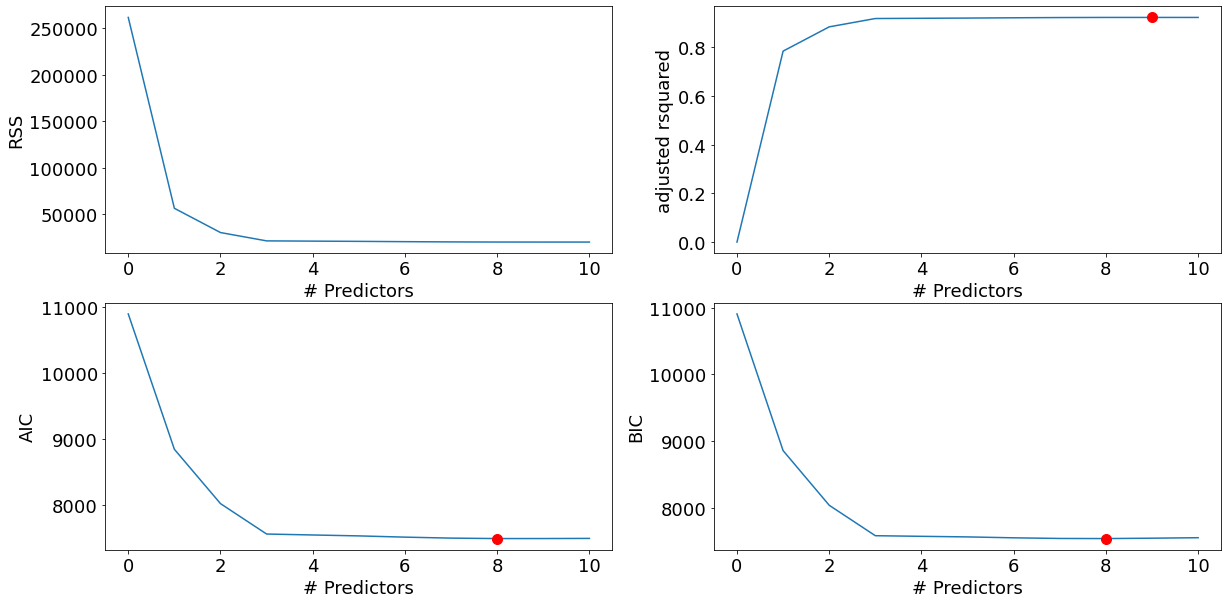

In [186]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})
# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a curve to show the relationship between the number of predictors and the RSS
plt.plot(models["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The idxmax() function can be used to identify the location of the maximum point of a vector
rsquared_adj = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')
# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.idxmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.idxmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [187]:
getBest(8)

Processed  45 models on 8 predictors in 0.1738753318786621 seconds.


model    <statsmodels.regression.linear_model.Regressio...
RSS                                           20465.031413
Name: 24, dtype: object

In [188]:
print(getBest(8)["model"].summary())


Processed  45 models on 8 predictors in 0.1765284538269043 seconds.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     1964.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:08:40   Log-Likelihood:                -3737.0
No. Observations:                1344   AIC:                             7492.
Df Residuals:                    1335   BIC:                             7539.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [189]:
best_coef = getBest(8)['model'].params.index[1:]

Processed  45 models on 8 predictors in 0.14615511894226074 seconds.


In [190]:
in_r2, out_r2 = run_model(list(best_coef),X_train_df_int,y_train,X_val_df_int,y_val)
print(f'In-sample-R2: {in_r2}\nOut-of-Sample-R2: {out_r2}')

In-sample-R2: 0.9216760716008511
Out-of-Sample-R2: 0.9188048945512973


In [255]:
# the independent variables set
def vif_df(formula,df):
    X = df[formula]

  
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]

    return vif_data

In [256]:
vif_df(list(best_coef),X_train_df_int)

,feature,VIF
0,S,29.293413
1,K,40.664564
2,r,17.095626
3,S K,18.870089
4,S tau,20.298659
5,K tau,36.187376
6,K r,10.671237
7,tau r,10.693013


In [257]:
vif_df(['S K','S tau','K tau','K r','tau r'],X_train_df_int)

,feature,VIF
0,S K,5.865471
1,S tau,7.559224
2,K tau,6.587807
3,K r,5.642745
4,tau r,4.835578


## Cross Validation for Regression

In [194]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfolds_regression = KFold(n_splits=10,random_state=1,shuffle = True)
lm = LinearRegression()

r2_model_cv = cross_val_score(lm,X_train_df_int[["K","S tau" , "K tau","K r","S K"]],
                           train_df_norm['Value'],cv=kfolds_regression)

In [195]:
print("Linear Regression: \n")
print("r squared of 10-folds:",r2_model_cv,"(mean r squared:",np.mean(r2_model_cv),")")


Linear Regression: 

r squared of 10-folds: [0.9056969  0.90194541 0.87632193 0.91089246 0.89317652 0.89899914
 0.91388059 0.88203997 0.88592431 0.9036861 ] (mean r squared: 0.897256334422243 )


## RidgeCV

In [196]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

alphas = 10**np.linspace(10,-2,100)*0.5

In [197]:
X_train = X_train_df_int[list(best_coef)].values
y_train = train_df_norm.Value

X_test = X_val_df_int[list(best_coef)].values

In [198]:
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train,y_train)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 8)

In [199]:
ridge2 = Ridge(alpha=4)
ridge2.fit(X_train, y_train) # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test) # Use trained model to predict on the test␣data
print(pd.Series(ridge2.coef_, index=X_train_df_int[list(best_coef)].columns)) # Print coefficients
print("\nmean_squared_error: ",mean_squared_error(y_val, pred2)) # Calculate␣the test MSE
print("\nout-of-sample R squared: ",ridge2.score(X_test, y_val)) #Calculate out-of-sample R squared

S        19.397250
K       -53.664470
r         3.801830
S K     -16.945082
S tau    12.627808
K tau    -0.698687
K r     -16.552273
tau r    11.451318
dtype: float64

mean_squared_error:  18.619625547797277

out-of-sample R squared:  0.9097480486110822


In [200]:
ridgecv = RidgeCV(alphas=alphas, scoring='r2', cv=10)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_


0.0466301673441609

In [201]:
ridge5 = Ridge(alpha=ridgecv.alpha_)
ridge5.fit(X_train, y_train)
ridge_cv_r2=ridge5.score(X_test,y_val)
print(f'RidgeCV R2: {ridge_cv_r2} ')

RidgeCV R2: 0.919059967171178 


## Using Anushka's Features

In [263]:
train_df = pd.read_csv("option_train.csv")
train_df.head()

train_df['s K'] = train_df.S * train_df.K
train_df['K-s'] = train_df.K - train_df.S
train_df['S/K'] = train_df.S / train_df.K
train_df['S r K'] = train_df.S * train_df.K * train_df.r


#create training and validation sets from df_train
train_nums = train_df.select_dtypes(["float64","int64"]) #not sure if allowed to use BS as a feature

y=train_nums["Value"].values
X=train_nums.drop("Value",axis=1).values

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.20,random_state = 1)

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_val_norm = mms.transform(X_val)



def normed_df(X,y):
    df1 = pd.DataFrame(X,columns = train_nums.columns[1:])
    df2 = pd.DataFrame(y,columns = ["Value"])
    df3 = pd.concat([df2,df1],axis=1)
    return df3

train_df_norm = normed_df(X_train_norm,y_train)
val_df_norm = normed_df(X_val_norm,y_val)

In [261]:
#S*K	S/K	S*r	S*r*K	K-S
result5 = smf.ols('Value ~ K*S + sss + S*r + S*r*K + Kms',data = train_df_norm).fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     4915.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:33:02   Log-Likelihood:                -3152.8
No. Observations:                1344   AIC:                             6324.
Df Residuals:                    1335   BIC:                             6370.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -319.8834      5.550    -57.640      0.000    -330.770    -308.996
K            170.5181      3.094     55.110      0.000     164.448     176.588
S            -24.5278      1.940    -12.642      0.000     -28.334     -20.722
K:S          -27.4438      3.067     -8.948      0.000     -33.461     -21.427
sss          394.3340      6.128     64.352      0.000     382.313     406.355
r             -2.8577      1.400     -2.042      0.041      -5.603      -0.112
S:r            0.8757      3.750      0.234      0.815      -6.480       8.232
r:K            6.7056      2.833      2.367      0.018       1.148      12.263
S:r:K         -1.5098      6.952     -0.217      0.828     -15.148      12.128
Kms          184.2918      3.342     55.146      0.000     177.736     190.848
==============================================================================
Omnibus:                        9.447   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.412
Skew:                          -0.200   Prob(JB):                      0.00904
Kurtosis:                       3.093   Cond. No.                     1.08e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [250]:
train_df_norm

,Value,S,K,tau,r,s K,K-s,S/K,S r K
0,0.125000,0.243162,0.80,0.632653,0.219409,0.713469,0.891702,0.075366,0.669211
1,0.845000,0.606384,0.72,0.408163,0.481013,0.725973,0.700514,0.243720,0.752188
2,13.198430,0.621094,0.56,0.877551,0.219409,0.591531,0.514756,0.414249,0.540350
3,0.780000,0.120179,0.48,0.061224,0.738397,0.420063,0.562287,0.367411,0.484306
4,2.505003,0.237539,0.64,0.887755,0.434599,0.578160,0.711561,0.229470,0.580953
...,...,...,...,...,...,...,...,...,...
1339,25.722126,0.610555,0.40,0.724490,0.177215,0.451757,0.335973,0.593813,0.382354
1340,37.975698,0.450747,0.24,0.500000,0.303797,0.283707,0.198425,0.747586,0.234440
1341,37.553755,0.810642,0.32,0.306122,0.434599,0.422088,0.189851,0.748521,0.413218
1342,16.055884,0.665745,0.48,0.418367,0.088608,0.531848,0.411574,0.515519,0.444515


In [252]:
in_r2, out_r2 = run_model(['s K','S/K','K-s','S r K'],train_df_norm,y_train,val_df_norm,y_val)
print(f'In-sample-R2: {in_r2}\nOut-of-Sample-R2: {out_r2}')

In-sample-R2: 0.9568083664857159
Out-of-Sample-R2: 0.9613385285863528


In [270]:
vif_df(['s K','S/K','K-s','S r K'],train_df_norm)

,feature,VIF
0,s K,107.423813
1,S/K,2.756545
2,K-s,25.635272
3,S r K,104.738408
